
[github](https://github.com/shibing624/similarities/blob/main/examples/image_search.ipynb)|[nbviewer](https://nbviewer.jupyter.org/github/shibing624/similarities/blob/main/examples/image_search.ipynb)|[colab](https://colab.research.google.com/github/shibing624/similarities/blob/main/examples/image_search.ipynb)

# Joint Image & Text Embeddings

This example shows how similarities can be used to map images and texts to the same vector space.

As model, we use the [OFA-Sys/chinese-clip-vit-huge-patch14](https://huggingface.co/OFA-Sys/chinese-clip-vit-huge-patch14), which was trained on a large set of images and image alt texts.

As a source for fotos, we use the [Unsplash Dataset Lite](https://unsplash.com/data), which contains about 25k images. See the [License](https://unsplash.com/license) about the Unsplash images. 

Note: 25k images is rather small. If you search for really specific terms, the chance are high that no such photo exist in the collection.

In [ ]:
# !pip install -U similarities

In [9]:
import sys

import pandas as pd
import glob
import json
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm import tqdm

sys.path.append('..')
from similarities import clip_embedding, clip_index, clip_filter, clip_server
from similarities.utils.get_file import http_get

In [10]:
# Next, we get about 25k images from Unsplash 
img_folder = 'photos/'
clip_folder = 'photos/csv/'
if not os.path.exists(clip_folder) or len(os.listdir(clip_folder)) == 0:
    os.makedirs(img_folder, exist_ok=True)
    
    photo_filename = 'unsplash-25k-photos.zip'
    if not os.path.exists(photo_filename):   #Download dataset if not exist
        http_get('http://sbert.net/datasets/'+photo_filename, photo_filename)
        
    #Extract all images
    with zipfile.ZipFile(photo_filename, 'r') as zf:
        for member in tqdm(zf.infolist(), desc='Extracting'):
            zf.extract(member, img_folder)
    df = pd.DataFrame({'image_path': glob.glob(img_folder + '/*'), 'image_name': [os.path.basename(x) for x in glob.glob(img_folder + '/*')]})
    os.makedirs(clip_folder, exist_ok=True)
    df.to_csv(f'{clip_folder}/unsplash-25k-photos.csv', index=False)

In [ ]:
# Now, we need to compute the embeddings
# Build embedding
clip_embedding(
    input_dir='photos/csv/',
    chunk_size=1000,
    image_embeddings_dir='clip_engine_25k/image_emb/',
    text_embeddings_dir=None,
    corpus_dir='clip_engine_25k/corpus/',
    model_name="OFA-Sys/chinese-clip-vit-base-patch16",
    batch_size=12,
    enable_image=True,
    image_column_name='image_path',
    enable_text=False,
    target_devices=None,
    normalize_embeddings=True,
    header=0,
)


In [31]:
# Build index
clip_index(
    image_embeddings_dir='clip_engine_25k/image_emb/',
    text_embeddings_dir=None,
    image_index_dir='clip_engine_25k/image_index/',
    text_index_dir=None,
    index_name='faiss.index',
    max_index_memory_usage='4G',
    current_memory_available='18G',
    use_gpu=False,
    nb_cores=None,
)


2023-10-08 12:03:38.495 | DEBUG    | similarities.faiss_clip_similarity:clip_index:166 - Starting build index from clip_engine_25k/image_emb/
2023-10-08 12:03:38.495 | DEBUG    | similarities.faiss_clip_similarity:clip_index:167 - Embedding path exist, building index using embeddings clip_engine_25k/image_emb/ ; saving in clip_engine_25k/image_index/
2023-10-08 12:03:38,574 [INFO]: Using 10 omp threads (processes), consider increasing --nb_cores if you have more
2023-10-08 12:03:38,575 [INFO]: Launching the whole pipeline 10/08/2023, 12:03:38
2023-10-08 12:03:38,575 [INFO]: Reading total number of vectors and dimension 10/08/2023, 12:03:38
100%|██████████| 50/50 [00:02<00:00, 23.44it/s]
2023-10-08 12:03:40,772 [INFO]: There are 24996 embeddings of dim 512
2023-10-08 12:03:40,772 [INFO]: >>> Finished "Reading total number of vectors and dimension" in 2.1968 secs
2023-10-08 12:03:40,773 [INFO]: 	Compute estimated construction time of the index 10/08/2023, 12:03:40
2023-10-08 12:03:40,774

2023-10-08 12:07:23.957 | DEBUG    | similarities.clip_module:__init__:58 - Device: cuda
2023-10-08 12:07:32.576 | INFO     | similarities.faiss_clip_similarity:clip_filter:311 - Load success. model: OFA-Sys/chinese-clip-vit-base-patch16, index: <faiss.swigfaiss_avx2.IndexHNSWFlat; proxy of <Swig Object of type 'faiss::IndexHNSWFlat *' at 0x7fe59fe81020> >, corpus size: 24996
2023-10-08 12:07:32.577 | DEBUG    | similarities.faiss_clip_similarity:clip_filter:316 - Query: texts size 2
2023-10-08 12:07:32.610 | DEBUG    | similarities.faiss_clip_similarity:batch_search_index:256 - Found 5 items with query '老虎'
2023-10-08 12:07:32.612 | DEBUG    | similarities.faiss_clip_similarity:batch_search_index:257 - The minimum distance is 0.47 and the maximum is 0.48
2023-10-08 12:07:32.613 | DEBUG    | similarities.faiss_clip_similarity:batch_search_index:258 - You may want to increase your result, use --num_results parameter. Or use the --threshold parameter.
2023-10-08 12:07:32.614 | DEBUG    |

Query:


'老虎'


Top 5 most similar image in corpus:
{"image_path":"photos\/fqtRYoRGDb0.jpg","image_name":"fqtRYoRGDb0.jpg"} (Score: 0.4750)


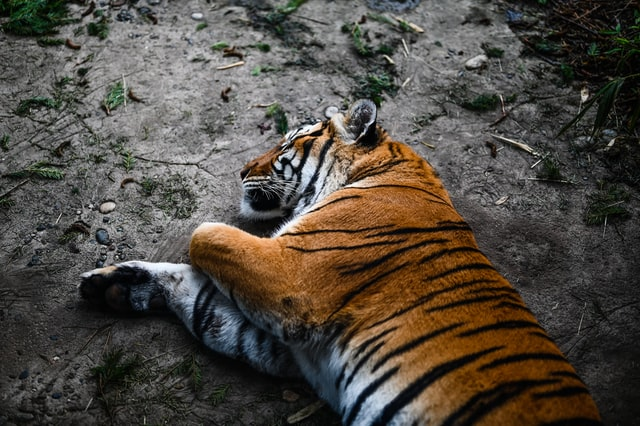

{"image_path":"photos\/_54TF64ad9M.jpg","image_name":"_54TF64ad9M.jpg"} (Score: 0.4711)


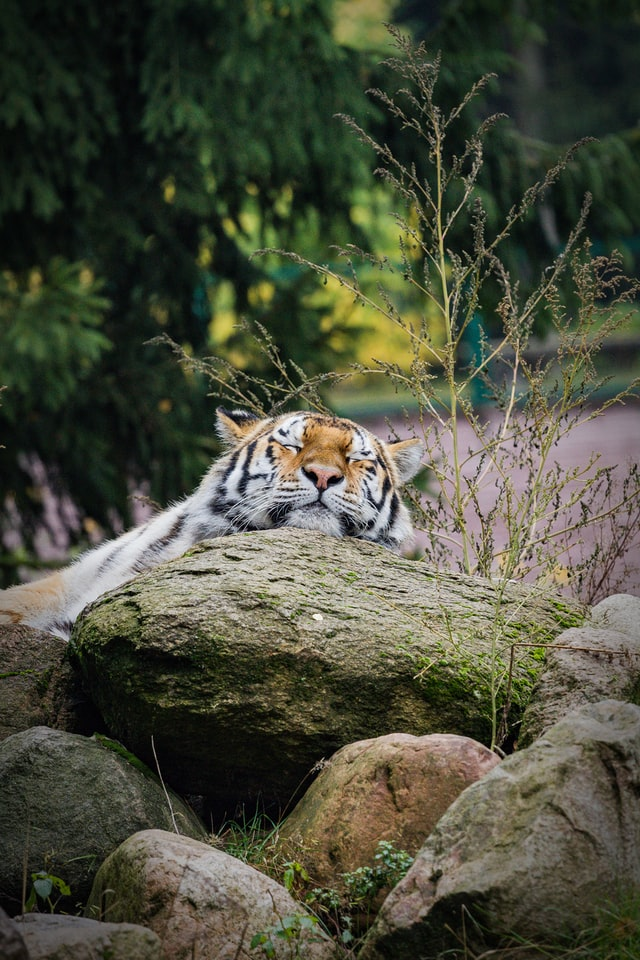

{"image_path":"photos\/mN-_5ZQAt3M.jpg","image_name":"mN-_5ZQAt3M.jpg"} (Score: 0.4698)


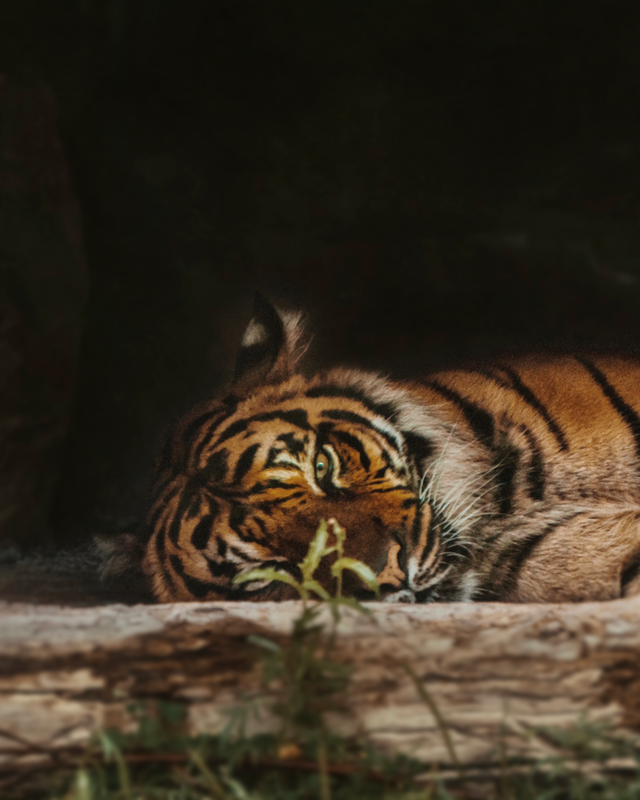

{"image_path":"photos\/jfQCT6XifkY.jpg","image_name":"jfQCT6XifkY.jpg"} (Score: 0.4670)


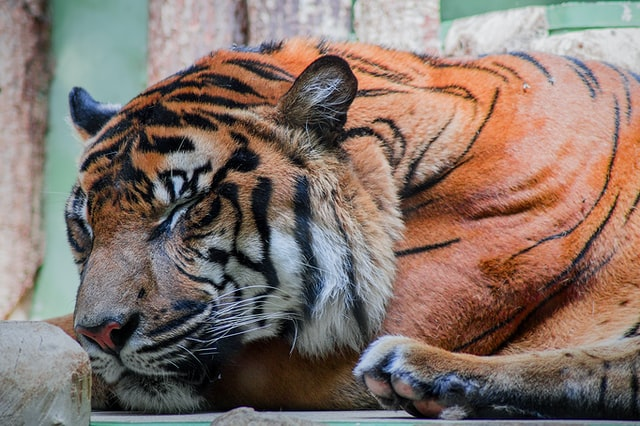

{"image_path":"photos\/OM7CvKnhjfs.jpg","image_name":"OM7CvKnhjfs.jpg"} (Score: 0.4661)


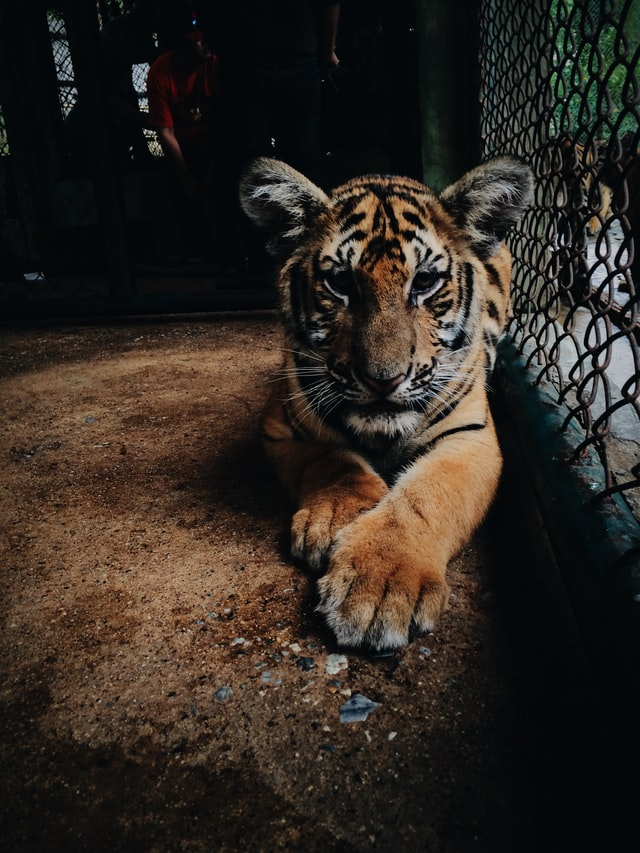

Query:


'Two dogs playing in the snow'


Top 5 most similar image in corpus:
{"image_path":"photos\/FAcSe7SjDUU.jpg","image_name":"FAcSe7SjDUU.jpg"} (Score: 0.5095)


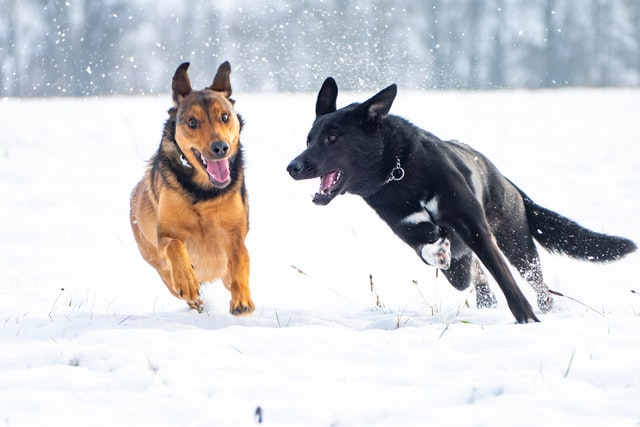

{"image_path":"photos\/lyStEjlKNSw.jpg","image_name":"lyStEjlKNSw.jpg"} (Score: 0.4932)


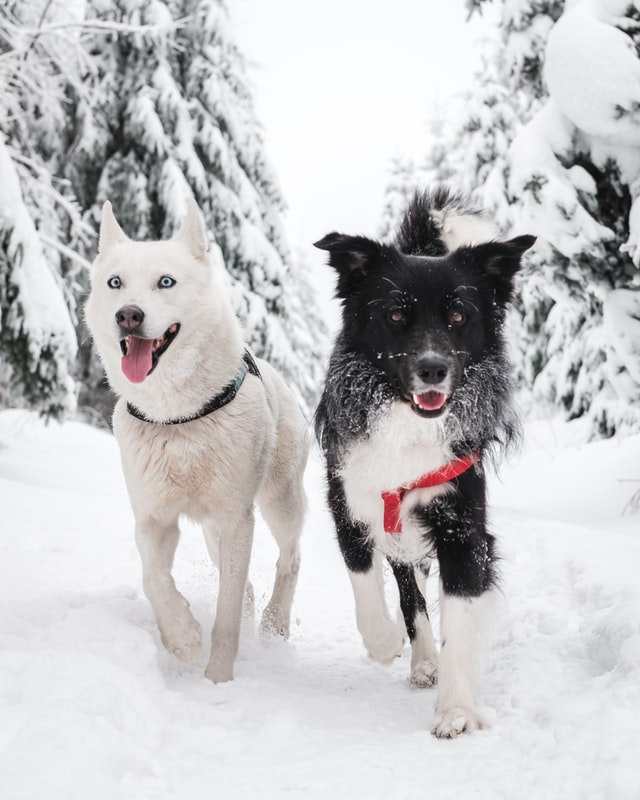

{"image_path":"photos\/x2zvGE7abYs.jpg","image_name":"x2zvGE7abYs.jpg"} (Score: 0.4782)


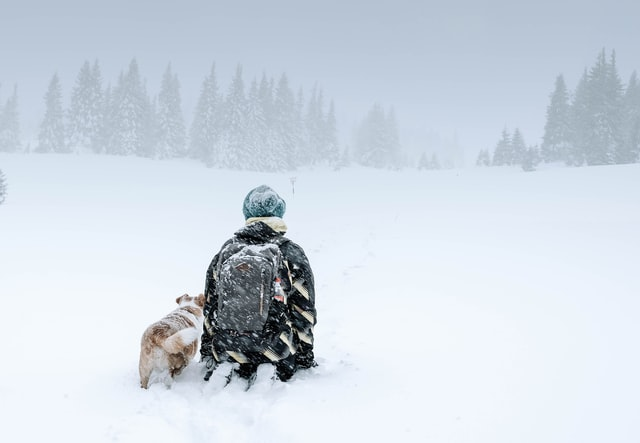

{"image_path":"photos\/JLC6T31cWdU.jpg","image_name":"JLC6T31cWdU.jpg"} (Score: 0.4760)


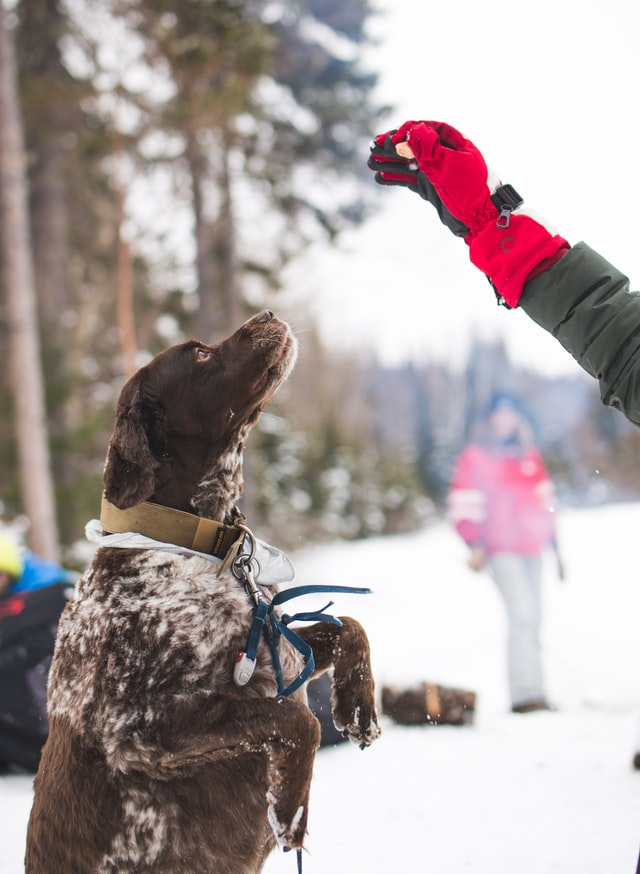

{"image_path":"photos\/LUScCjZ62uQ.jpg","image_name":"LUScCjZ62uQ.jpg"} (Score: 0.4744)


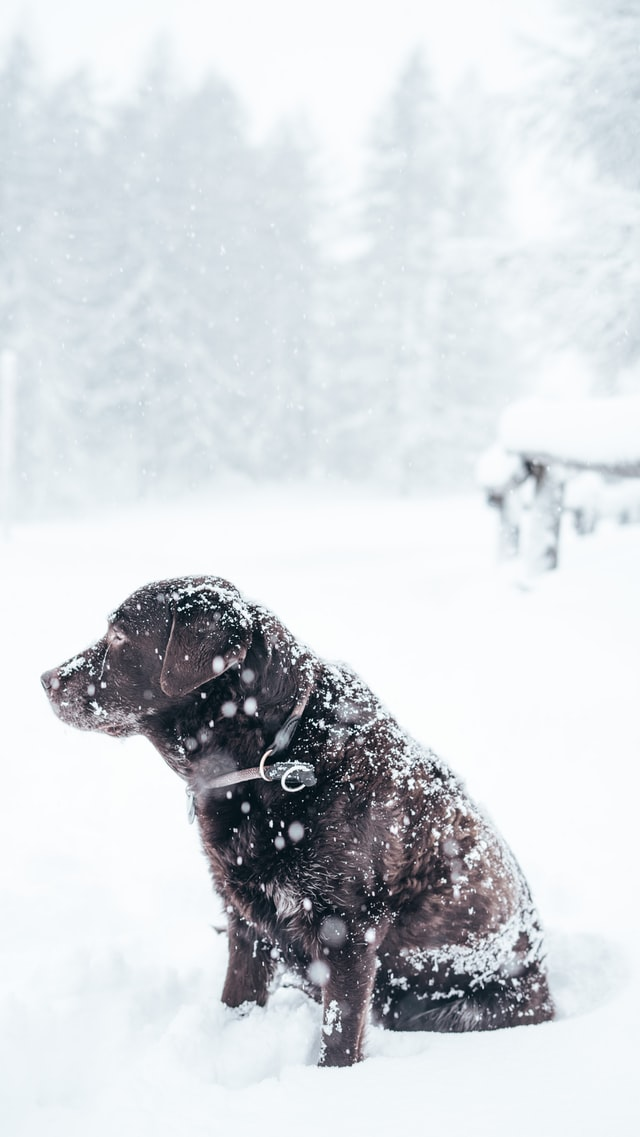

In [33]:

# Filter(search) 文搜图, support multi query, batch search
sentences = ['老虎', 'Two dogs playing in the snow']
hits = clip_filter(
    texts=sentences,
    output_file="outputs/result_txt.json",
    model_name="OFA-Sys/chinese-clip-vit-base-patch16",
    index_dir='clip_engine_25k/image_index/',
    index_name="faiss.index",
    corpus_dir='clip_engine_25k/corpus/',
    num_results=5,
    threshold=None,
    device=None,
)


for q, sorted_text_scores in zip(sentences, hits):
    print("Query:")
    display(q)
    print("\nTop 5 most similar image in corpus:")
    # [{'item': i, 'similarity': j, 'id': k} for i, j, k in sorted_text_scores]

    for text_score in sorted_text_scores[0:5]:
        item = text_score[0]
        print(item, "(Score: %.4f)" % (text_score[1]))
        item_dict = json.loads(item)
        image_path = item_dict.get('image_path', "")
        display(IPImage(image_path, width=200))

# Image-to-Image Search
You can use the method also for image-to-image search.

To achieve this, you pass `path/to/image.jpg` to the search method.

It will then return similar images

2023-10-08 12:09:25.517 | DEBUG    | similarities.clip_module:__init__:58 - Device: cuda
2023-10-08 12:09:31.053 | INFO     | similarities.faiss_clip_similarity:clip_filter:311 - Load success. model: OFA-Sys/chinese-clip-vit-base-patch16, index: <faiss.swigfaiss_avx2.IndexHNSWFlat; proxy of <Swig Object of type 'faiss::IndexHNSWFlat *' at 0x7fe5b1ac0db0> >, corpus size: 24996
2023-10-08 12:09:31.346 | DEBUG    | similarities.faiss_clip_similarity:clip_filter:319 - Query: images size 2
2023-10-08 12:09:31.492 | DEBUG    | similarities.faiss_clip_similarity:batch_search_index:256 - Found 5 items with query '<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x995 at 0x7FE6883FFA30>'
2023-10-08 12:09:31.495 | DEBUG    | similarities.faiss_clip_similarity:batch_search_index:257 - The minimum distance is 0.81 and the maximum is 1.00
2023-10-08 12:09:31.495 | DEBUG    | similarities.faiss_clip_similarity:batch_search_index:258 - You may want to increase your result, use --num_results p

Query:
photos/7Pw3UIwBj7c.jpg


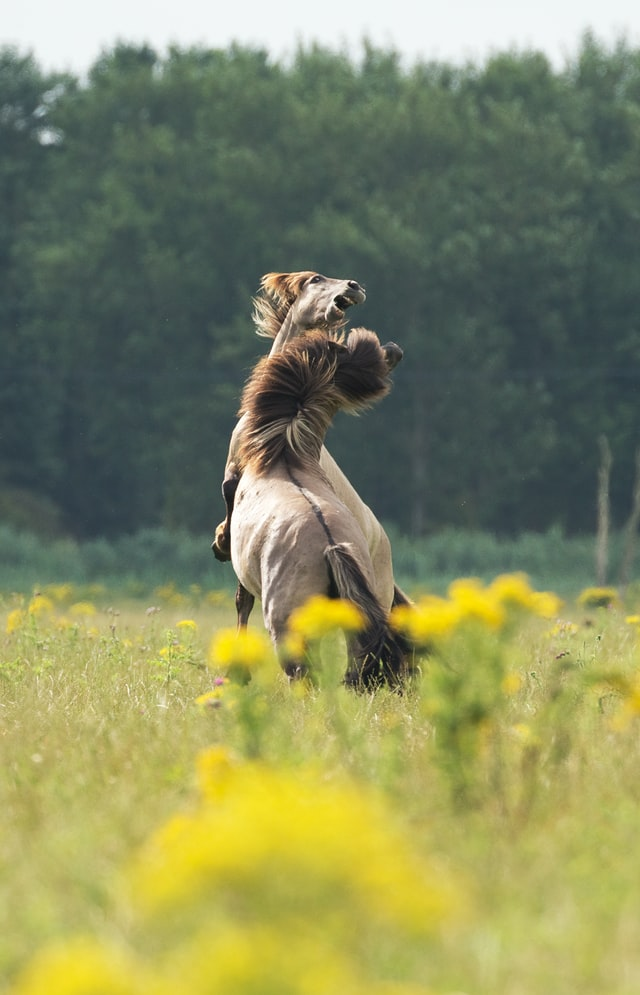


Top 5 most similar image in corpus:
{"image_path":"photos\/7Pw3UIwBj7c.jpg","image_name":"7Pw3UIwBj7c.jpg"} (Score: 1.0000)


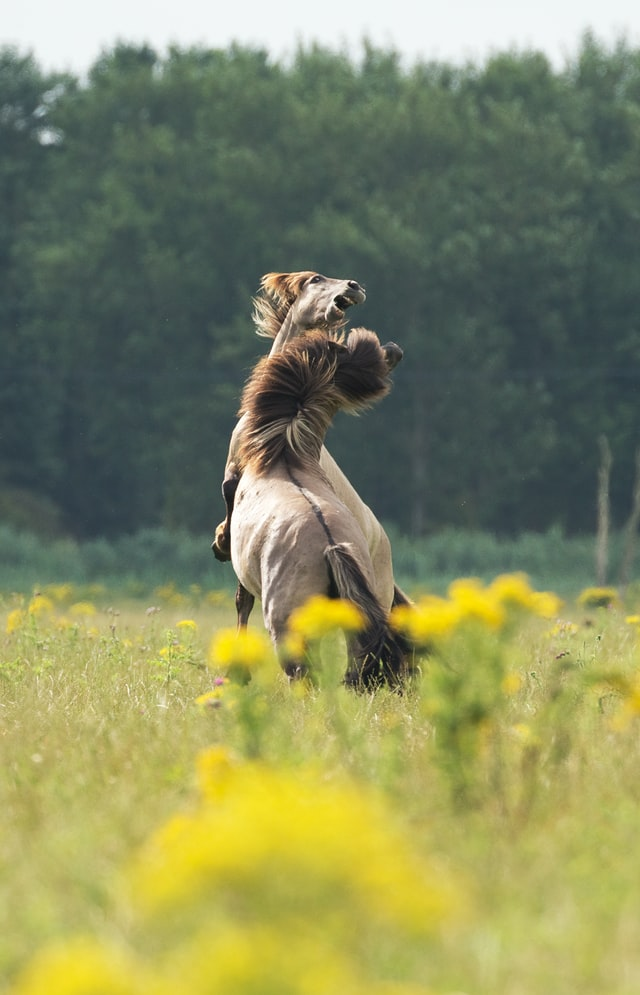

{"image_path":"photos\/LWVIR87DHPY.jpg","image_name":"LWVIR87DHPY.jpg"} (Score: 0.8289)


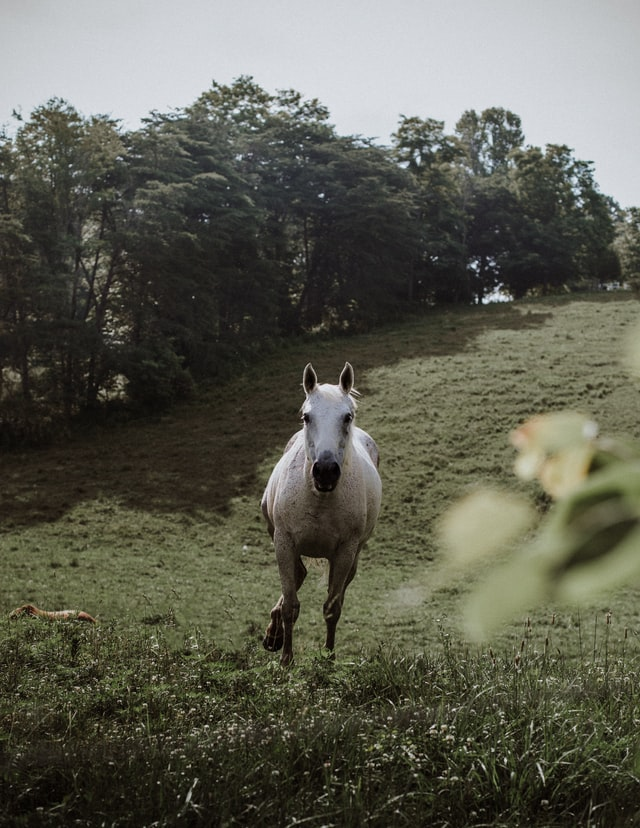

{"image_path":"photos\/hHwilFZfwbA.jpg","image_name":"hHwilFZfwbA.jpg"} (Score: 0.8262)


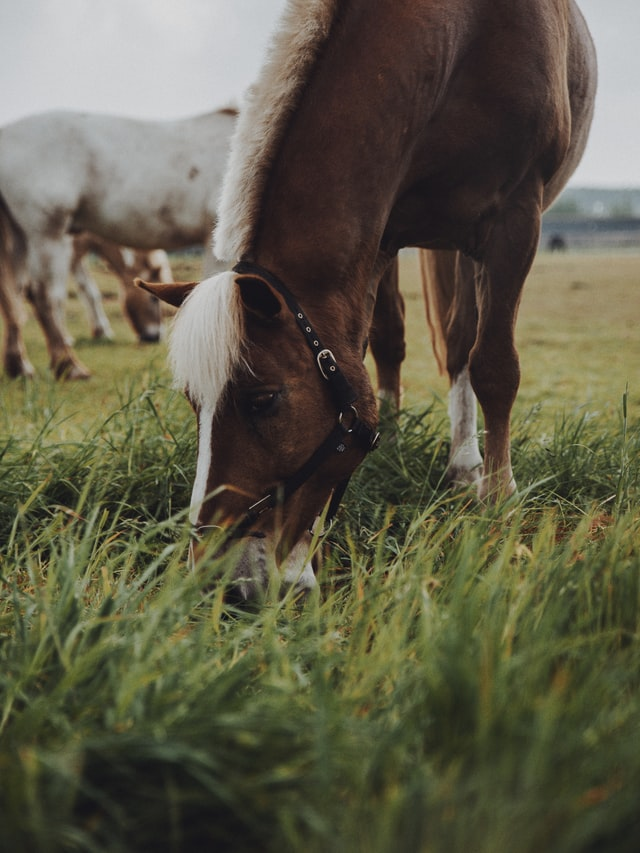

{"image_path":"photos\/YMJ1IiItvPY.jpg","image_name":"YMJ1IiItvPY.jpg"} (Score: 0.8168)


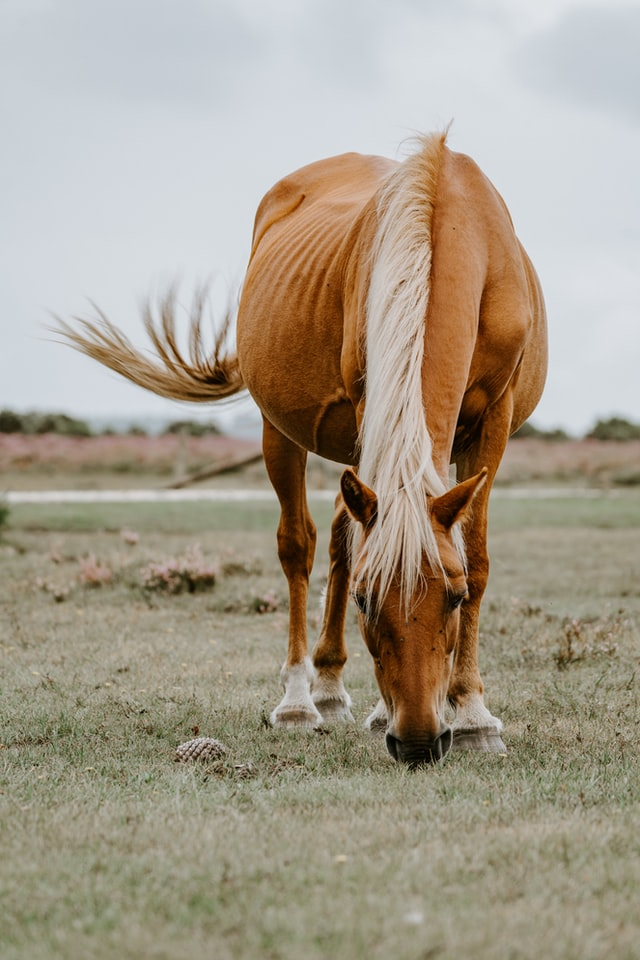

{"image_path":"photos\/6Qo7dWR2wZM.jpg","image_name":"6Qo7dWR2wZM.jpg"} (Score: 0.8101)


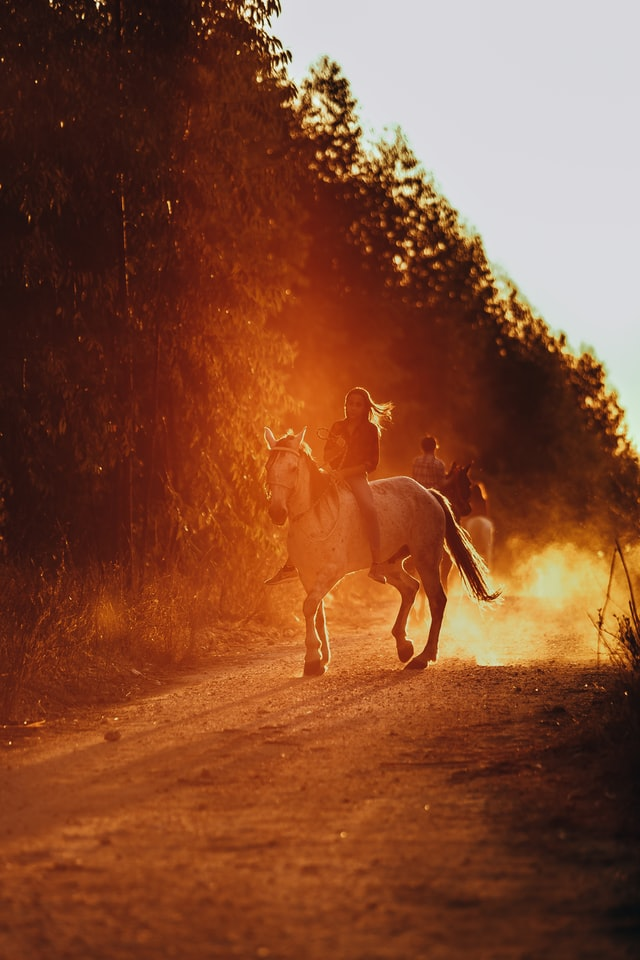

Query:
photos/6Fo47c49zEQ.jpg


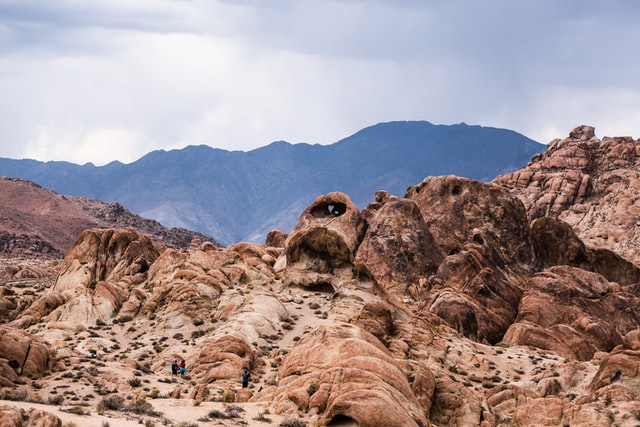


Top 5 most similar image in corpus:
{"image_path":"photos\/6Fo47c49zEQ.jpg","image_name":"6Fo47c49zEQ.jpg"} (Score: 1.0000)


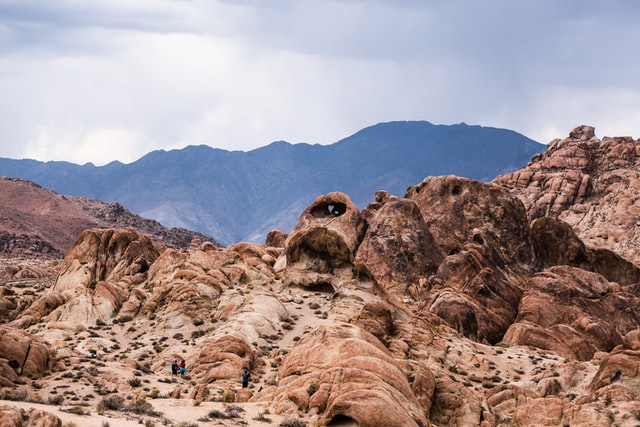

{"image_path":"photos\/Tr9dFY48ZR8.jpg","image_name":"Tr9dFY48ZR8.jpg"} (Score: 0.9005)


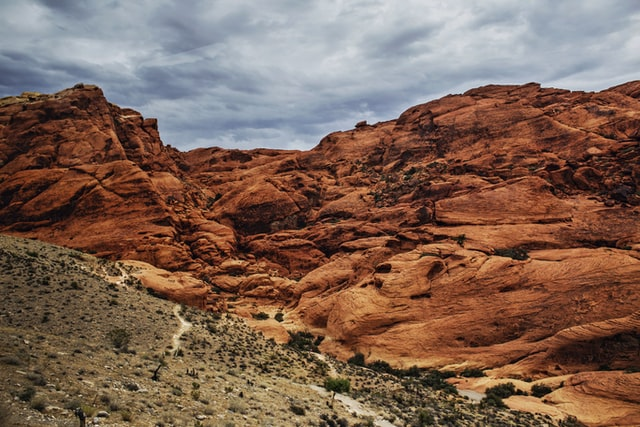

{"image_path":"photos\/YqCAN6WvMec.jpg","image_name":"YqCAN6WvMec.jpg"} (Score: 0.8745)


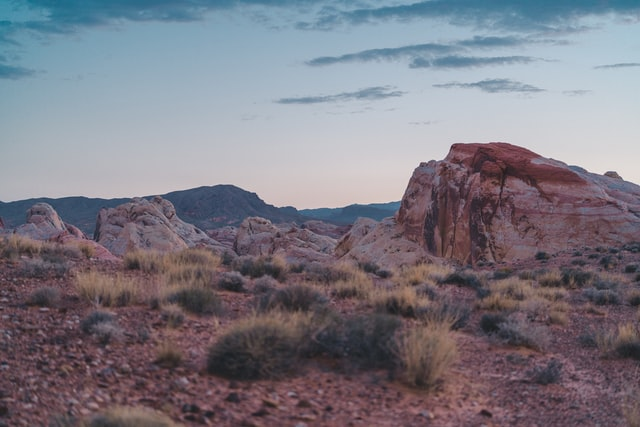

{"image_path":"photos\/VnxD9HBR49g.jpg","image_name":"VnxD9HBR49g.jpg"} (Score: 0.8727)


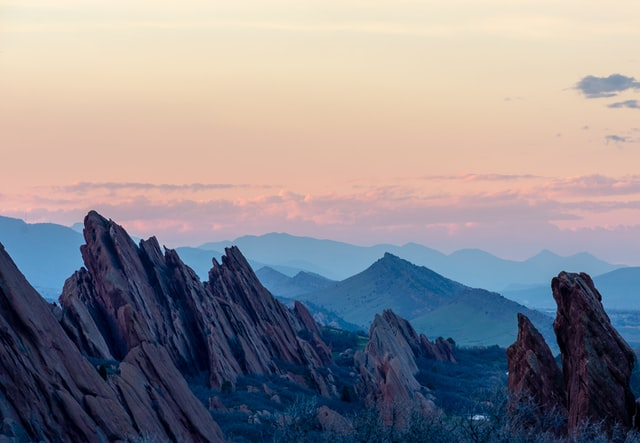

{"image_path":"photos\/eKrJC4CmHwk.jpg","image_name":"eKrJC4CmHwk.jpg"} (Score: 0.8695)


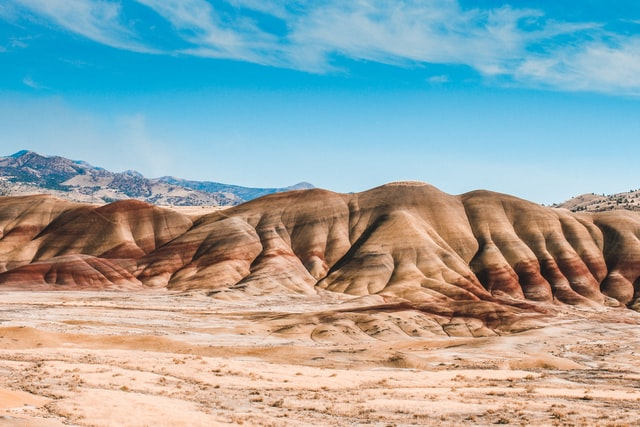

In [35]:
# Filter(search) 图搜图, support multi query, batch search
images = ['photos/7Pw3UIwBj7c.jpg', 'photos/6Fo47c49zEQ.jpg']
hits = clip_filter(
    images=images,
    output_file="outputs/result_img.json",
    model_name="OFA-Sys/chinese-clip-vit-base-patch16",
    index_dir='clip_engine_25k/image_index/',
    index_name="faiss.index",
    corpus_dir='clip_engine_25k/corpus/',
    num_results=5,
    threshold=None,
    device=None,
)


for q, sorted_text_scores in zip(images, hits):
    print("Query:")
    print(q)
    display(IPImage(q, width=200))
    print("\nTop 5 most similar image in corpus:")
    # [{'item': i, 'similarity': j, 'id': k} for i, j, k in sorted_text_scores]

    for text_score in sorted_text_scores[0:5]:
        item = text_score[0]
        print(item, "(Score: %.4f)" % (text_score[1]))
        item_dict = json.loads(item)
        image_path = item_dict.get('image_path', "")
        display(IPImage(image_path, width=200))